# 數位訊號處理 Digital Signal Processing

## 非周期波 Non-periodic signals

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### 啁啾訊號 Chirp

指頻率隨時間而改變（增加或減少）的信號，由於這種信號聽起來類似鳥鳴的啾聲。(https://zh.wikipedia.org/wiki/啁啾) A chirp is a signal in which the frequency increases (up-chirp) or decreases (down-chirp) with time.

> 線性啁啾訊號 Linear Chirp

產生一個從A3到A5跨兩個八度(octave)的**線性**啁啾訊號 Make a linear chirp from A3 to A5.

In [2]:
signal = thinkdsp.Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

啁啾訊號的初始波形 Here's what the waveform looks like near the beginning.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


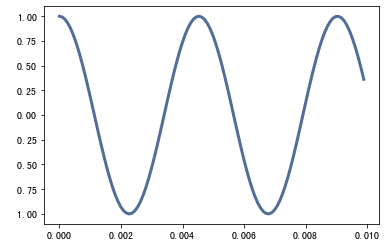

In [3]:
wave1.segment(start=0, duration=0.01).plot()

啁啾訊號的中間波形 And in the middle.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


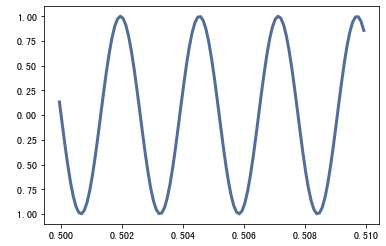

In [4]:
wave1.segment(start=0.5, duration=0.01).plot()

末端波形 And near the end.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


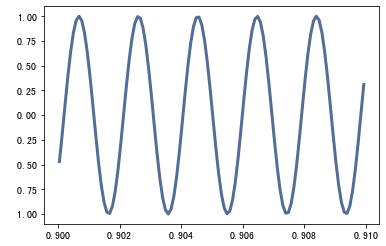

In [5]:
wave1.segment(start=0.9, duration=0.01).plot()

可觀察出頻率漸次升高 The frequency of a linear chirp is gradually increasing. 

> 指數啁啾訊號 Exponential Chirp

相同頻率值域與時間的**指數**啁啾訊號，音高(pitch)起初快速揚升，然後慢慢降下 Here's an exponential chirp with the same frequency range and duration.

第一個八度花了2/3秒，第二個八度則用了4/3秒 The first octave occupies 2/3 second, and the second octave occupies 4/3 second.

In [6]:
signal = thinkdsp.ExpoChirp(start=220, end=880)
wave2 = signal.make_wave(duration=2)
wave2.make_audio()

## 頻譜洩漏 Leakage

用以計算頻譜的離散傅立葉轉換(DFT)假設波為週期性的，亦即有限區段中的波包含一無限訊號的完整周期，但是實際上這個假設經常不成立！ The Discrete Fourier Transform (DFT), which we use to compute Spectrums, treats waves as if they are periodic; that is, it assumes that the finite segment it operates on is a complete period from an infinite signal that repeats over all time. In practice, this assumption is often false, which creates problems.

頻譜洩漏是某些頻率的能量跑到其它的頻率(通常是鄰近的頻率)了 Spectral leakage is when some of the energy at one frequency appears at another frequency (usually nearby).

Let's look at the effect of leakage on a sine signal (which only contains one frequency component).

In [7]:
signal = thinkdsp.SinSignal(freq=440)

如果取樣期間是週期的**整數倍**，則該段的開始和結束會**排列齊整**，從而使洩漏最小 If the duration is an integer multiple of the period, the beginning and end of the segment **line up**, and we get minimal leakage.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


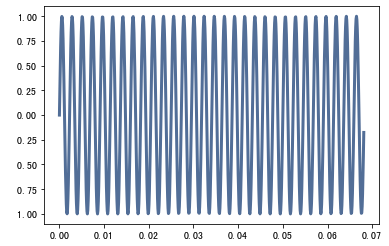

In [8]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()

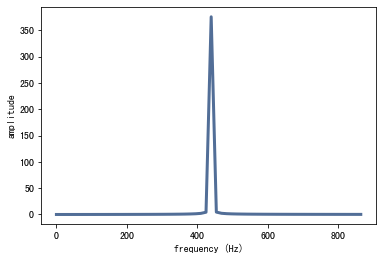

In [9]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude', legend=False)

如果取樣期間不是週期的整數倍，則洩漏的情況會相當嚴重 If the duration is not a multiple of a period, the leakage is pretty bad.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


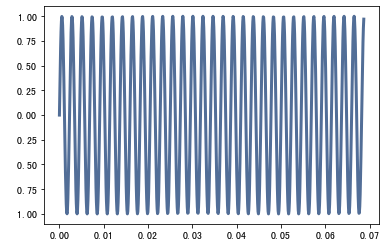

In [10]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()

從240Hz到640Hz都有額外的頻率成份 There are additional components spread out from 240 to 640 Hz.

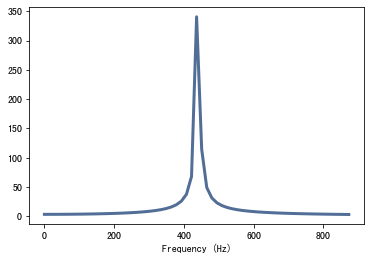

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

窗函數有助於減緩頻譜洩漏的現象(不過也降低了總能量，下圖高度下降) Windowing helps (but notice that it reduces the total energy).

漢明窗、冪指窗、指數窗...... Hamming, power, exponential... windowing functions.

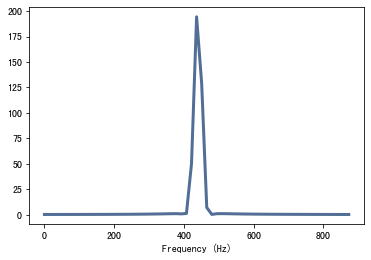

In [12]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

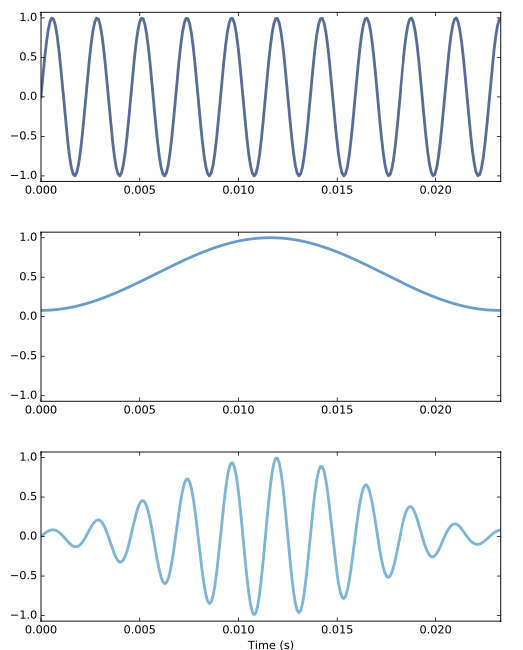

In [13]:
from IPython.display import Image
Image(filename='./HammingWindow.png')

## 頻譜時間圖 Spectrogram

頻率與時間之間的關係 If you blindly compute the DFT of a non-periodic segment, you get "motion blur".

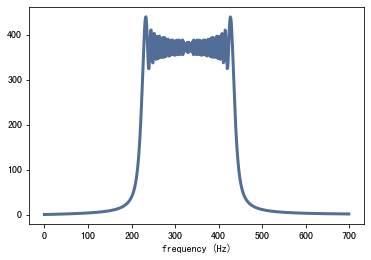

In [14]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700) # abscissa
thinkplot.config(xlabel='frequency (Hz)')

頻譜時間圖是短時DFT的視覺化，讓我們瞭解頻譜如何隨時間變化 A spectrogram is a visualization of a short-time DFT (STFT) that lets you see how the spectrum varies over time. It is quite useful for **non-periodic signals**.

> 頻譜時間圖是一種熱圖 It's a heat map.

In [15]:
def plot_spectrogram(wave, seg_length):
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    thinkplot.show(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


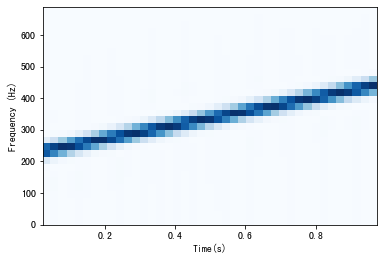

<Figure size 576x432 with 0 Axes>

In [16]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

> 加博爾限制或取捨 Gabor limit or tradeoff

對頻譜時間圖而言，時間及頻率都是越小越好，但是魚與熊掌卻是不可兼得！ For the spectrogram, smaller is better, no matter in time (second) or in frequency (Hertz).

如果增加區隔的長度，可獲得較佳的頻率解析度，不過時間解析度就表現較差了! If you increase the segment length, you get better frequency resolution, but the time resolution become worse.

Time resolution (s) 0.09287981859410431
Frequency resolution (Hz) 10.7666015625


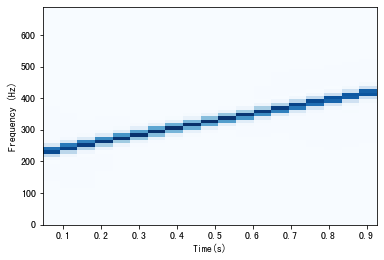

<Figure size 576x432 with 0 Axes>

In [17]:
plot_spectrogram(wave, 1024)

如果減少區隔的長度，可獲得較佳的時間解析度，不過頻率解析度就表現較差了! If you decrease the segment length, you get better time resolution, but the frequency resolution become worse.

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


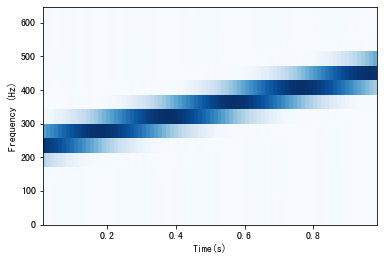

<Figure size 576x432 with 0 Axes>

In [18]:
plot_spectrogram(wave, 256)

In [19]:
slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

interactive(children=(IntSlider(value=128, description='seg_length', max=4096, min=128, step=128), Output()), …

## 啁啾訊號的頻譜 Spectrum of a chirp

The following interaction lets you customize the Eye of Sauron as you vary the start and end frequency of the chirp.

In [20]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal = thinkdsp.Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude')
    
    #TODO: add player

In [21]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);

interactive(children=(FloatSlider(value=100.0, description='start', max=1000.0, min=100.0, step=50.0), FloatSl…

### 參考文獻：

Downey, A.B. (2014), Think DSP: Digital Signal Processing in Python, Green Tea Press.

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)